In [9]:
import pandas as pd
import numpy as np

from persiantools.jdatetime import JalaliDate

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

import arabic_reshaper
from bidi.algorithm import get_display

In [10]:
farsi_font = FontProperties(
    fname='../../report/styles/fonts/XB Niloofar.ttf')

farsi = lambda x: get_display(arabic_reshaper.reshape(str(x)))

---

In [3]:
data_df = pd.read_csv('../data/1k_refah_db_clean.zip')
data_df

,ID,ParentID,BirthDate,GenderId,postalcode,Provincename,countyname,isurban,AmCrdtr_95,Amdbtr_95,...,Cars_Count,CarsPrice_Sum,Trips_Count_AirNotPilgrimage,Trips_Count_NotAirNotPilgrimage,Trips_Count_AirPilgrimage,Trips_Count_NotAirPilgrimage,HasMojavezSenfi,Senf,HasBimeSalamat,BimeSalmat_Type
0,8520256269,7449267102,1985-09-08,1,335414.0,تهران,شهريار,True,125000000,92500000,...,0,0,0,0,0,0,0,NaN,1,بيمه سلامت همگاني
1,10457574042,10457574042,1985-03-21,1,316985.0,تهران,ملارد,False,400000000,400000000,...,0,0,0,0,0,0,0,NaN,0,NaN
2,12494345556,9774300678,2018-10-29,2,9417883.0,خراسان شمالي,بجنورد,False,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
3,4014326052,6733056921,2002-11-16,2,4617949.0,مازندران,آمل,True,25000000,30000000,...,0,0,0,0,0,0,0,NaN,0,NaN
4,8075316438,6263910690,2015-07-01,2,8897131.0,چهارمحال وبختياري,لردگان,True,2500000,2500000,...,0,0,0,0,0,0,0,NaN,1,بيمه سلامت همگاني
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28200,9892994694,9892994694,1986-12-31,1,6831933.0,لرستان,دلفان,True,275000000,275000000,...,1,855771499,0,0,0,0,0,NaN,0,NaN
28201,6237093738,8377263603,1970-10-24,2,514493.0,آذربايجان شرقي,تبريز,True,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
28202,10081771527,6085494270,2008-03-06,2,3754167.0,تهران,قدس,True,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
28203,2941478724,306509133,1970-07-23,2,6444133.0,خوزستان,دشت آزادگان,False,0,0,...,0,0,0,0,0,0,0,NaN,1,روستاييان


In [4]:
data_df['BirthDate'] = pd.to_datetime(data_df['BirthDate'])
data_df['JalaliBirth'] = data_df['BirthDate'].apply(lambda x: JalaliDate(x))

In [7]:
END_DATE = JalaliDate(1399, 6, 1)

age_calc = lambda x: np.round((END_DATE - x).days / 365.25, 1)
data_df['Age'] = data_df['JalaliBirth'].apply(age_calc)

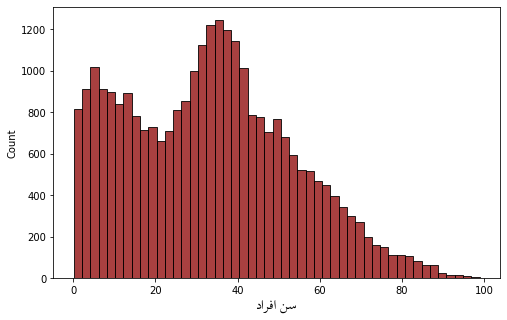

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_df, x = 'Age', color='darkred')
plt.xlabel(farsi('سن افراد'), font=farsi_font, fontsize=14)
plt.savefig('../../report/figures/EDA/AgeHistogram.pdf')